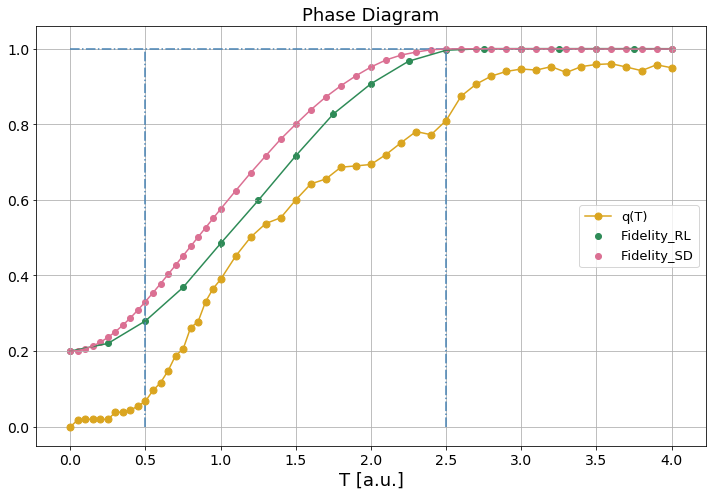

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def correlation(matrix,h):
    '''
    Given a matrix this function computes the correlation quantity Q(T) as in the paper.
    Matrix must have dimension (n_protocols,lenght_of_protocol)    
    '''
    n_row = matrix.shape[0]
    n_col = matrix.shape[1] 
    
    mean_hx = np.array([matrix[:,i].mean() for i in range(n_col)]) #mean over all protocols at fixed time
    avg_over_h = np.array([np.array([ (matrix[i,j]-mean_hx[j])**2 for i in range(n_row)]).sum()/n_row for j in range(n_col)])
    avg_over_Nt = (1/((h*h)*n_col))*(avg_over_h.sum())
    return  avg_over_Nt




#RL data
times_RL = np.arange(0,4.1,0.25)
fidelity_RL = pd.read_csv("fidelity_RL.txt", skiprows=1,header=None)

#SD data
times_first_part=np.arange(0,1,0.05)
times_second_part=np.arange(1,4.1,0.1)
times_SD=np.concatenate([times_first_part,times_second_part])
q=[]
for T in times_SD:
    
    data = np.load("protocols_m/testT"+str(round(T, 2))+".npy")[0,:,:] #first dimension is redundant 
    #!warning: correlation normalization term musb be changed according to field values
    q.append(correlation(data,h=4))
    
fidelity_SD = pd.read_csv('fidelity_SD.txt', skiprows=1,header=None)

q[0]=0


fig, ax = plt.subplots(figsize=(10,7))
#RL
#plot Fidelity values
ax.errorbar(times_RL,fidelity_RL.mean(axis=1).values, yerr=fidelity_RL.std(axis=1).values, color="seagreen")
ax.scatter(times_RL,fidelity_RL.mean(axis=1).values,label="Fidelity_RL", color="seagreen")

#SD
ax.plot(times_SD, q, marker="o", color="goldenrod", markersize=7, label="q(T)")
ax.errorbar(times_SD,fidelity_SD.mean(axis=1).values, yerr=fidelity_SD.std(axis=1).values, color="palevioletred")
ax.scatter(times_SD,fidelity_SD.mean(axis=1).values,label="Fidelity_SD", color="palevioletred")


ax.hlines(1,0,4, color="steelblue", linestyle="-.")
ax.vlines(0.5,0,1,  color="steelblue", linestyle="-.")
ax.vlines(2.5,0,1,  color="steelblue", linestyle="-.")
ax.set_title(r"Phase Diagram", fontsize=18)
ax.set_xlabel("T [a.u.]", fontsize=18)
#ax.set_ylabel(r" $Fidelity$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=13, loc=5)
ax.grid()
fig.tight_layout()
fname= "phase_diagram.pdf"
fig.savefig(fname)
plt.show()